In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Step 1 download the data for 3 different time intervals and 5 different assets
data_1d = {
    "AAPL": pd.read_csv(r'./Data/AAPL_1d_adjusted_data.csv'),
    "EUR/USD": pd.read_csv(r'./Data/EURUSD_1d_adjusted_data.csv'),
    "Gold": pd.read_csv(r'./Data/Gold_1d_adjusted_data.csv'),
    "S&P 500": pd.read_csv(r'./Data/SP500_1d_adjusted_data.csv'),
    "US Bond": pd.read_csv(r'./Data/USTBond_1d_adjusted_data.csv'),
}

data_1h = {
    "AAPL": pd.read_csv(r'./Data/AAPL_1h_adjusted_data.csv'),
    "EUR/USD": pd.read_csv(r'./Data/EURUSD_1h_adjusted_data.csv'),
    "Gold": pd.read_csv(r'./Data/Gold_1h_adjusted_data.csv'),
    "S&P 500": pd.read_csv(r'./Data/SP500_1h_adjusted_data.csv'),
    "US Bond": pd.read_csv(r'./Data/USTBond_1h_adjusted_data.csv'),
}

data_15m = {
    "AAPL": pd.read_csv(r'./Data/AAPL_15m_adjusted_data.csv'),
    "EUR/USD": pd.read_csv(r'./Data/EURUSD_15m_adjusted_data.csv'),
    "Gold": pd.read_csv(r'./Data/Gold_15m_adjusted_data.csv'),
    "S&P 500": pd.read_csv(r'./Data/SP500_15m_adjusted_data.csv'),
    "US Bond": pd.read_csv(r'./Data/USTBond_15m_adjusted_data.csv'),
}

In [5]:
data_15m['EUR/USD'] = data_15m['EUR/USD'].iloc[:,[0,1,2,3,4,5,6]]
data_15m['EUR/USD'].columns = data_15m['AAPL'].columns

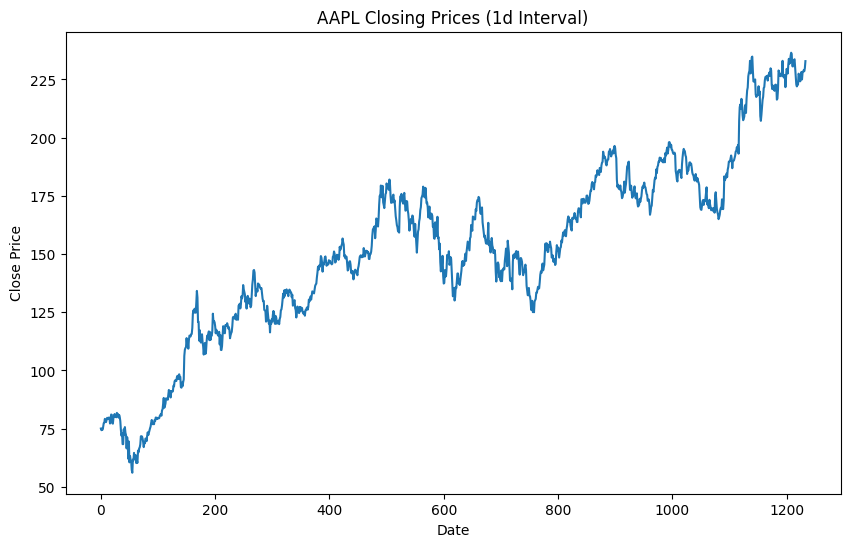

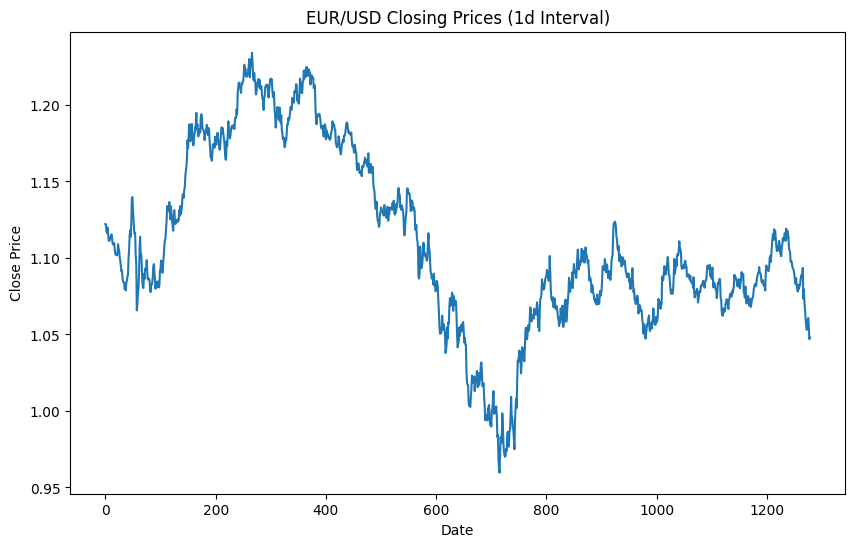

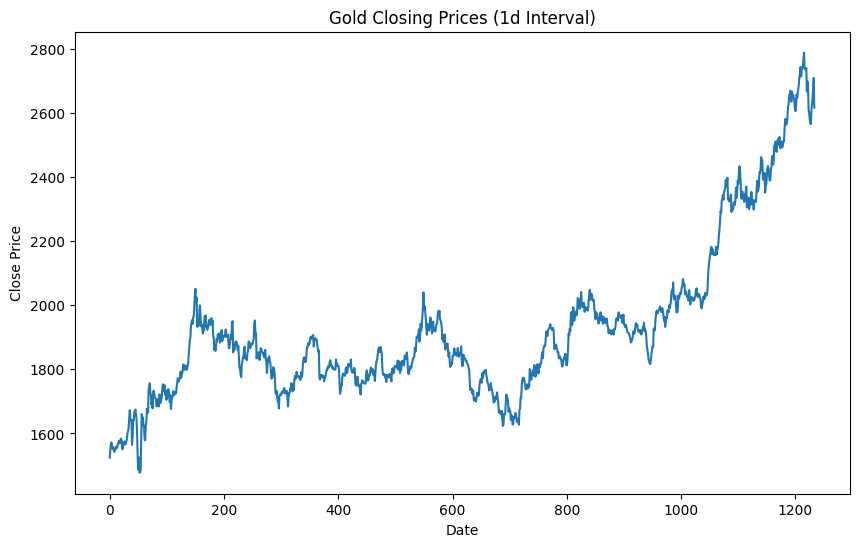

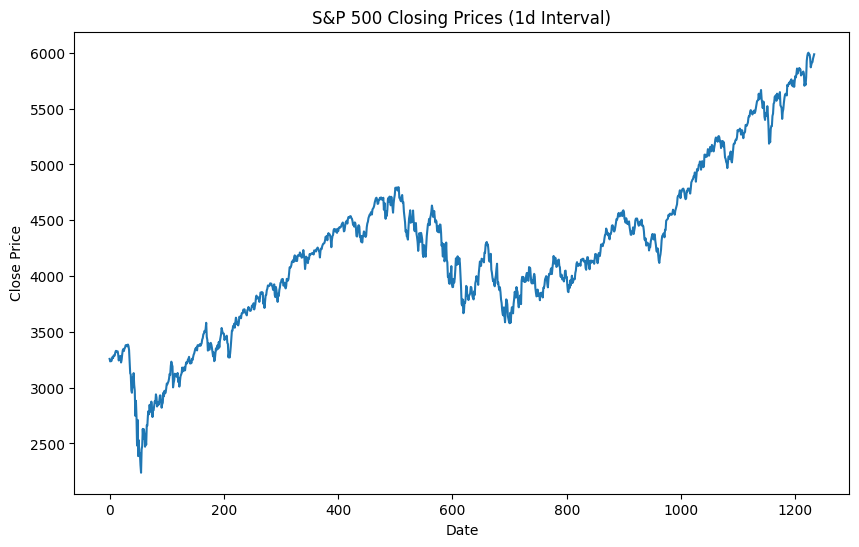

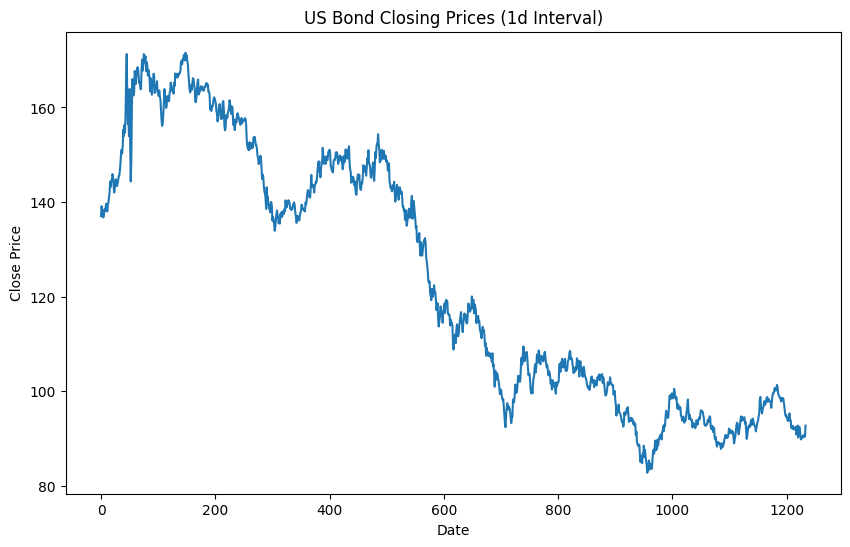

In [6]:
# Step 2: Visualize the Data for Each Asset and timeframe
for asset, df in data_1d.items():
    plt.figure(figsize=(10, 6))
    df['Close'].plot(title=f'{asset} Closing Prices (1d Interval)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

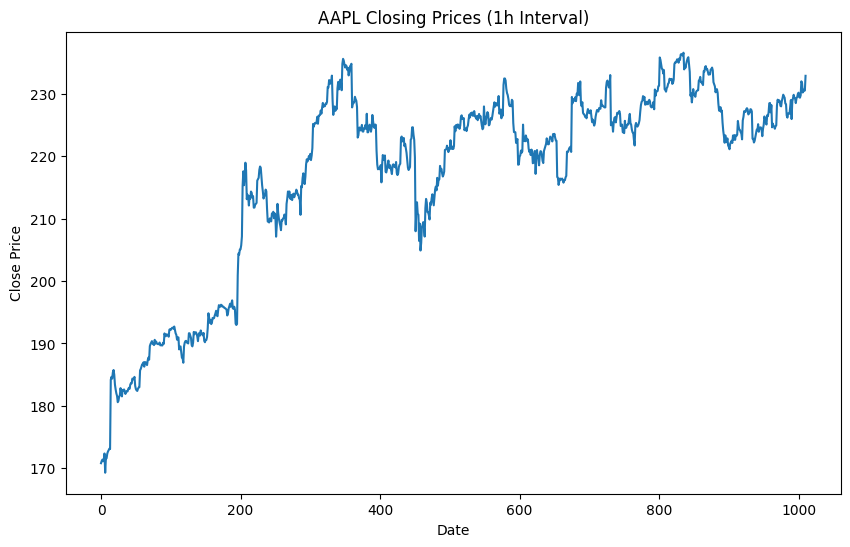

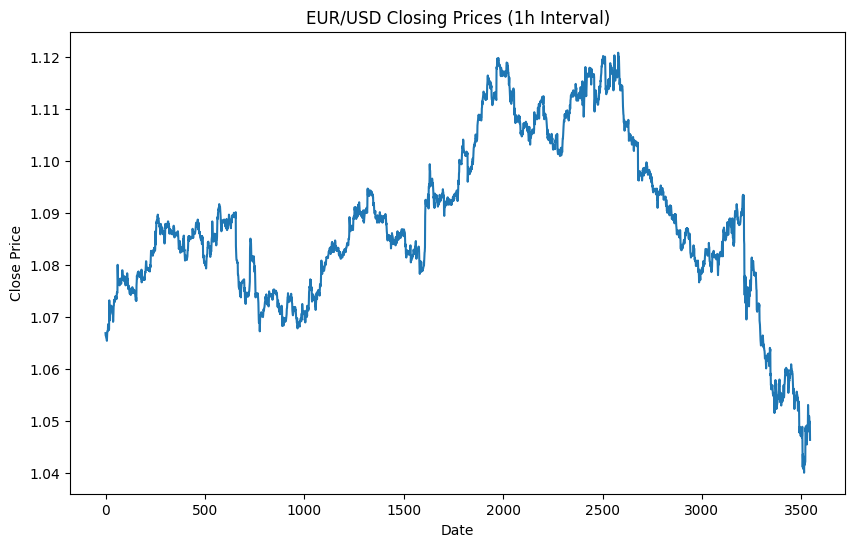

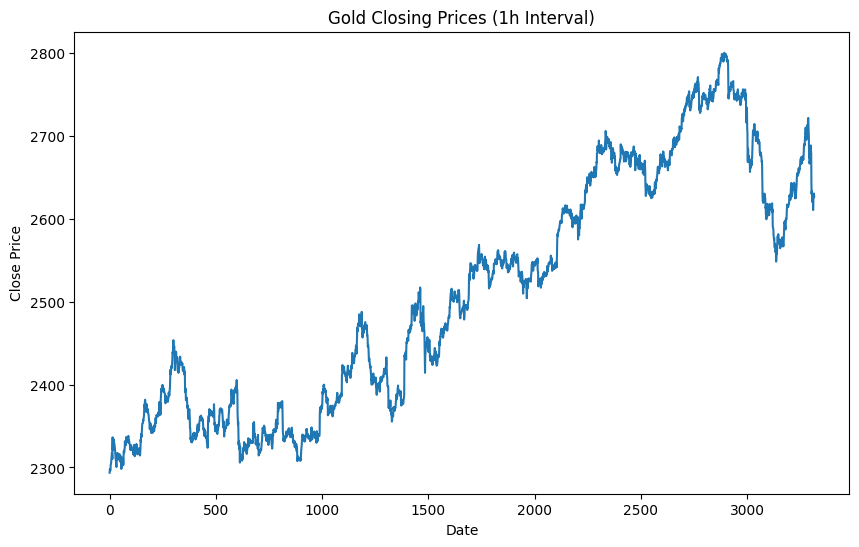

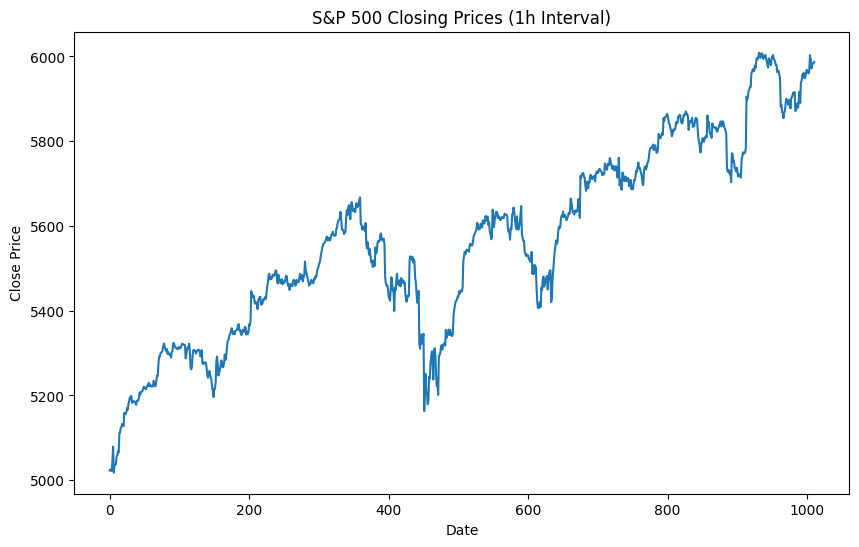

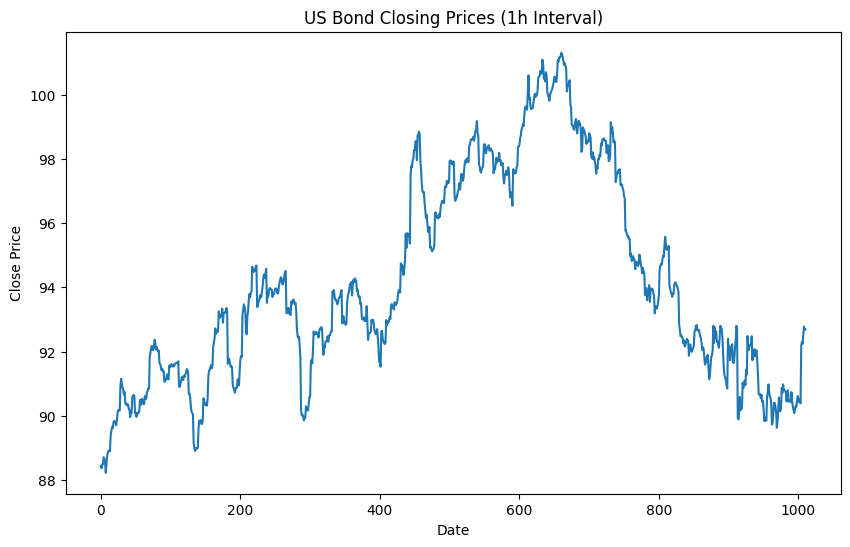

In [7]:
for asset, df in data_1h.items():
    plt.figure(figsize=(10, 6))
    df['Close'].plot(title=f'{asset} Closing Prices (1h Interval)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

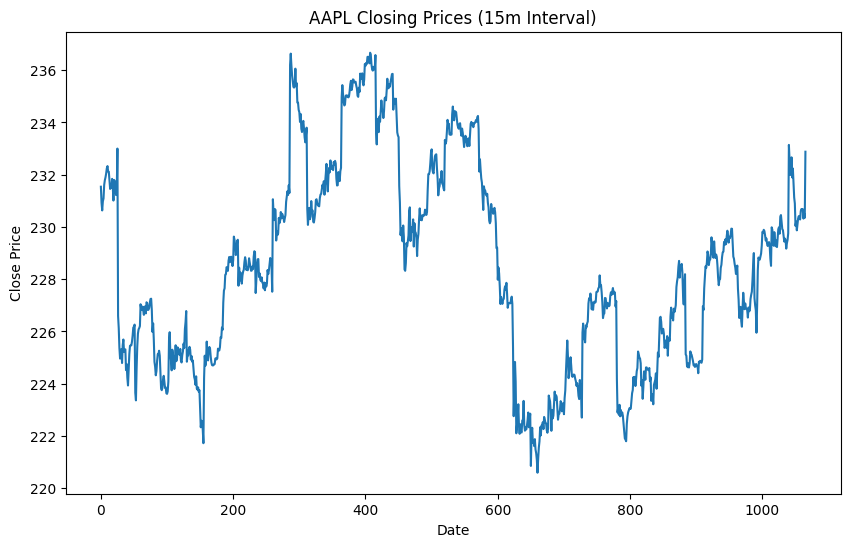

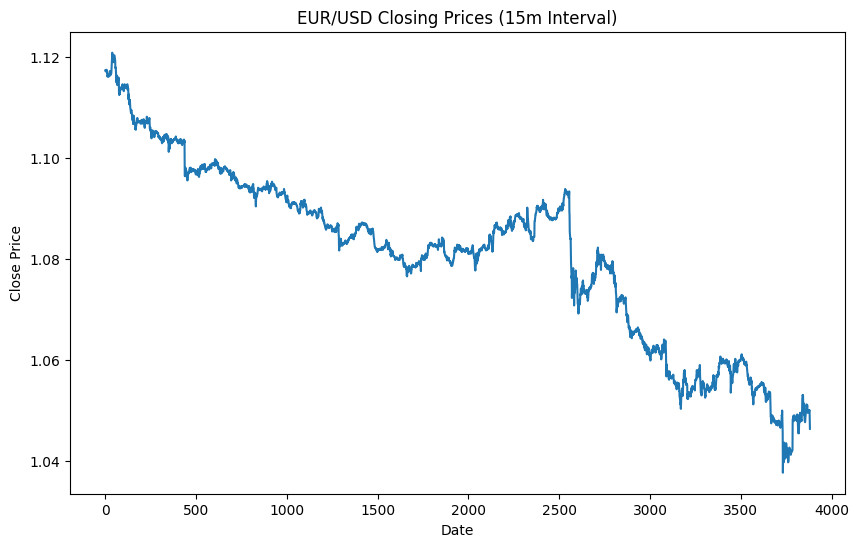

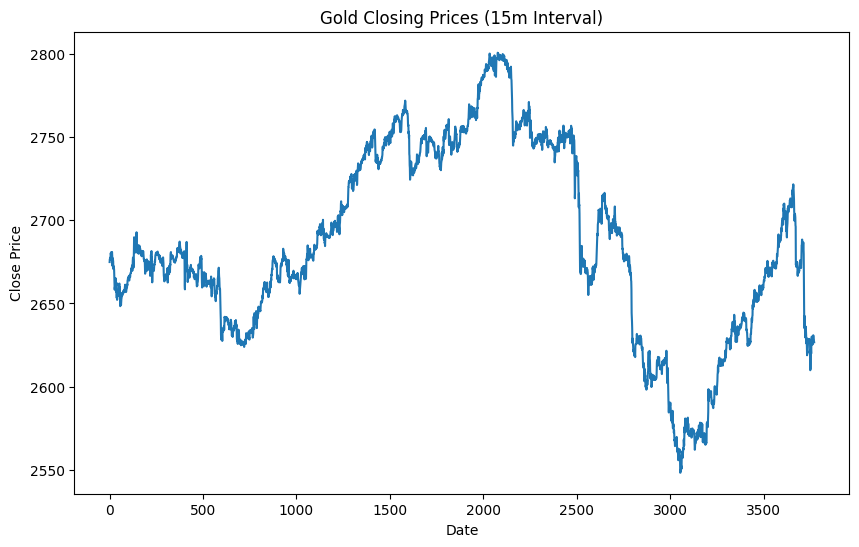

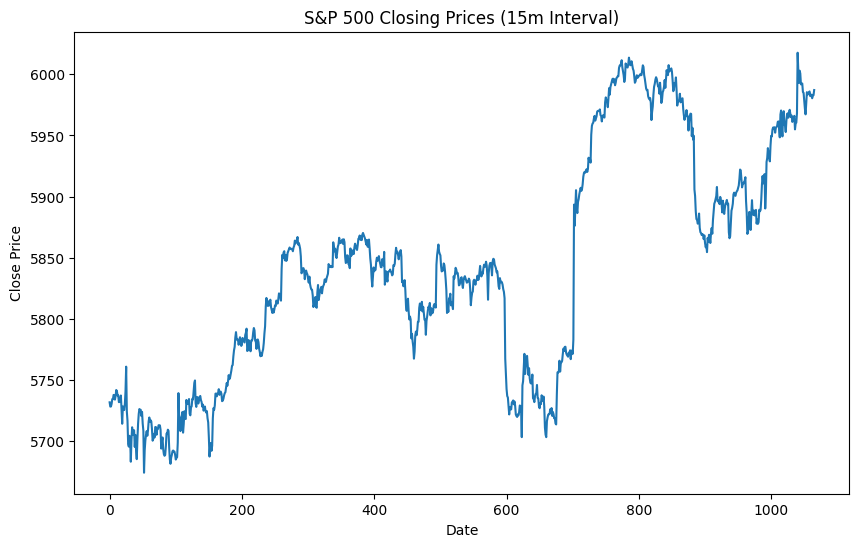

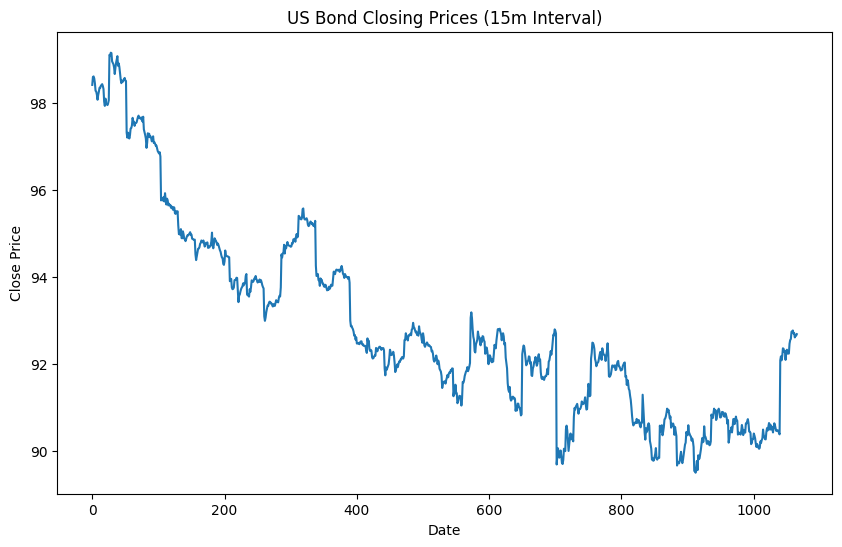

In [8]:
for asset, df in data_15m.items():
    plt.figure(figsize=(10, 6))
    df['Close'].plot(title=f'{asset} Closing Prices (15m Interval)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

In [9]:
# Step 3 create the signal creation
def moving_average_crossover(df, ma_window):
    """
    Calculates short-term and long-term moving averages, and generates buy/sell signals.
    """
    df["Ma"] = df["Close"].rolling(window=ma_window).mean()
    df["Signal"] = 0  # Set as default
    df.loc[df["Close"] > df["Ma"], "Signal"] = 1   # Buy signal
    df.loc[df["Close"] <= df["Ma"], "Signal"] = 0  # Sell signal
    return df

In [10]:
# Step 4 apply the signals
# for each interval we take the equivalent of 5 days since we have no data for weekends it is basiclu a weekly moving average

for asset, df in data_1d.items():

    df = moving_average_crossover(df, 5)


for asset, df in data_1h.items():

    df = moving_average_crossover(df, (5*24))


for asset, df in data_15m.items():

    df = moving_average_crossover(df, (5*24*4))

In [11]:
data_15m['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1066 non-null   object 
 1   Adj Close  1066 non-null   float64
 2   Close      1066 non-null   float64
 3   High       1066 non-null   float64
 4   Low        1066 non-null   float64
 5   Open       1066 non-null   float64
 6   Volume     1066 non-null   int64  
 7   Ma         587 non-null    float64
 8   Signal     1066 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 75.1+ KB


In [12]:
# Step 5 calculate the strategy results

def strategy_calculations(df, blank):

    df = df.iloc[:,[0,2,7,8]]

    df["Return"] = df["Close"].pct_change()  # Percentage change in prices

    df["Position"] = df["Signal"].shift(1).fillna(0)

    df['Portfolio_return'] = df['Return'] * df['Position']

    df['Portfolio_cumulative_return'] = (1 + df['Portfolio_return']).cumprod()

    df['100$ investment'] = df['Portfolio_cumulative_return'] * 100

    df['Date'] = pd.to_datetime(df['Date'])

    df = df.set_index('Date')

    df = df.iloc[blank-1:,:]

    return(df)

In [13]:
# df = data_15m['EUR/USD']

# df = df.iloc[:,[0,2,7,8]]

# df["Return"] = df["Close"].pct_change()

# df["Position"] = df["Signal"].shift(1).fillna(0)

# df['Portfolio_return'] = df['Return'] * df['Position']

# df['Portfolio_cumulative_return'] = (1 + df['Portfolio_return']).cumprod()

# df['100$ investment'] = df['Portfolio_cumulative_return'] * 100

# df = df.iloc[480:]


In [14]:
# Step 6 apply the strategy calculations

for asset, df in data_1d.items():
    data_1d[asset] = strategy_calculations(df, 5)

for asset, df in data_1h.items():
    data_1h[asset] = strategy_calculations(df, 5 * 24)

for asset, df in data_15m.items():
    data_15m[asset] = strategy_calculations(df, 5 * 24 * 4)


C:\Users\Oskar\AppData\Local\Temp\ipykernel_37600\789975340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Return"] = df["Close"].pct_change()  # Percentage change in prices
C:\Users\Oskar\AppData\Local\Temp\ipykernel_37600\789975340.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Position"] = df["Signal"].shift(1).fillna(0)
C:\Users\Oskar\AppData\Local\Temp\ipykernel_37600\789975340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [15]:
evaluation_1d = pd.DataFrame(columns=['AAPL', 'EUR/USD', 'Gold', 'S&P 500', 'US Bond'], index=['Sharpe_ratio', 'Max_Drawdown', 'Win_Rate'])

for asset, df in data_1d.items():
    
    evaluation_1d.loc['Sharpe_ratio', asset] = df["Portfolio_return"].mean() / df["Portfolio_return"].std() * (252**0.5)

    evaluation_1d.loc['Max_Drawdown', asset] = (df['Portfolio_cumulative_return'] / df['Portfolio_cumulative_return'].cummax() - 1).min()

    evaluation_1d.loc['Win_Rate', asset] = (df["Portfolio_return"] > 0).mean()



evaluation_1h = pd.DataFrame(columns=['AAPL', 'EUR/USD', 'Gold', 'S&P 500', 'US Bond'], index=['Sharpe_ratio', 'Max_Drawdown', 'Win_Rate'])

for asset, df in data_1h.items():
    
    evaluation_1h.loc['Sharpe_ratio', asset] = df["Portfolio_return"].mean() / df["Portfolio_return"].std() * (252**0.5)

    evaluation_1h.loc['Max_Drawdown', asset] = (df['Portfolio_cumulative_return'] / df['Portfolio_cumulative_return'].cummax() - 1).min()

    evaluation_1h.loc['Win_Rate', asset] = (df["Portfolio_return"] > 0).mean()



evaluation_15m = pd.DataFrame(columns=['AAPL', 'EUR/USD', 'Gold', 'S&P 500', 'US Bond'], index=['Sharpe_ratio', 'Max_Drawdown', 'Win_Rate'])

for asset, df in data_15m.items():
    
    evaluation_15m.loc['Sharpe_ratio', asset] = df["Portfolio_return"].mean() / df["Portfolio_return"].std() * (252**0.5)

    evaluation_15m.loc['Max_Drawdown', asset] = (df['Portfolio_cumulative_return'] / df['Portfolio_cumulative_return'].cummax() - 1).min()

    evaluation_15m.loc['Win_Rate', asset] = (df["Portfolio_return"] > 0).mean()



In [16]:
evaluation_1d

,AAPL,EUR/USD,Gold,S&P 500,US Bond
Sharpe_ratio,0.179172,0.08046,0.385247,0.197172,-0.49075
Max_Drawdown,-0.421126,-0.12739,-0.242455,-0.273355,-0.427278
Win_Rate,0.290244,0.243137,0.289431,0.314634,0.222764


In [17]:
evaluation_1h

,AAPL,EUR/USD,Gold,S&P 500,US Bond
Sharpe_ratio,0.45088,0.130143,0.270295,0.808914,0.15573
Max_Drawdown,-0.118593,-0.021902,-0.065751,-0.028271,-0.053343
Win_Rate,0.339686,0.218914,0.321239,0.40583,0.269058


In [18]:
evaluation_15m

,AAPL,EUR/USD,Gold,S&P 500,US Bond
Sharpe_ratio,-0.068872,-0.189974,0.286259,0.019858,0.419237
Max_Drawdown,-0.049669,-0.016569,-0.02741,-0.032044,-0.002869
Win_Rate,0.201022,0.098149,0.271181,0.425894,0.02385


In [19]:
data_1d['AAPL']

,Close,Ma,Signal,Return,Position,Portfolio_return,Portfolio_cumulative_return,100$ investment
Date,,,,,,,,
2020-01-08 00:00:00+00:00,75.797501,74.958000,1,0.016086,0.0,0.000000,1.000000,100.000000
2020-01-09 00:00:00+00:00,77.407501,75.422000,1,0.021241,1.0,0.021241,1.021241,102.124081
2020-01-10 00:00:00+00:00,77.582497,76.067000,1,0.002261,1.0,0.002261,1.023550,102.354954
2020-01-13 00:00:00+00:00,79.239998,76.925000,1,0.021364,1.0,0.021364,1.045417,104.541703
2020-01-14 00:00:00+00:00,78.169998,77.639499,1,-0.013503,1.0,-0.013503,1.031300,103.130047
...,...,...,...,...,...,...,...,...
2024-11-19 00:00:00+00:00,228.279999,226.928000,1,0.001140,1.0,0.001140,1.055883,105.588331
2024-11-20 00:00:00+00:00,229.000000,227.704001,1,0.003154,1.0,0.003154,1.059214,105.921360
2024-11-21 00:00:00+00:00,228.520004,227.764001,1,-0.002096,1.0,-0.002096,1.056993,105.699343


In [20]:
data_15m['AAPL']

,Close,Ma,Signal,Return,Position,Portfolio_return,Portfolio_cumulative_return,100$ investment
Date,,,,,,,,
2024-10-24 12:15:00+00:00,229.519394,229.593277,0,0.002772,0.0,0.000000,1.000000,100.000000
2024-10-24 12:30:00+00:00,229.735001,229.589516,1,0.000939,0.0,0.000000,1.000000,100.000000
2024-10-24 12:45:00+00:00,230.307999,229.588231,1,0.002494,1.0,0.002494,1.002494,100.249417
2024-10-24 13:00:00+00:00,230.710007,229.588393,1,0.001746,1.0,0.001746,1.004244,100.424405
2024-10-24 13:15:00+00:00,230.270004,229.586914,1,-0.001907,1.0,-0.001907,1.002329,100.232879
...,...,...,...,...,...,...,...,...
2024-11-25 14:45:00+00:00,230.679993,226.353707,1,0.000130,1.0,0.000130,0.986318,98.631761
2024-11-25 15:00:00+00:00,230.320007,226.351774,1,-0.001561,1.0,-0.001561,0.984778,98.477842
2024-11-25 15:15:00+00:00,230.520004,226.350357,1,0.000868,1.0,0.000868,0.985634,98.563355


Text(0.5, 1.0, '15 minute interval')

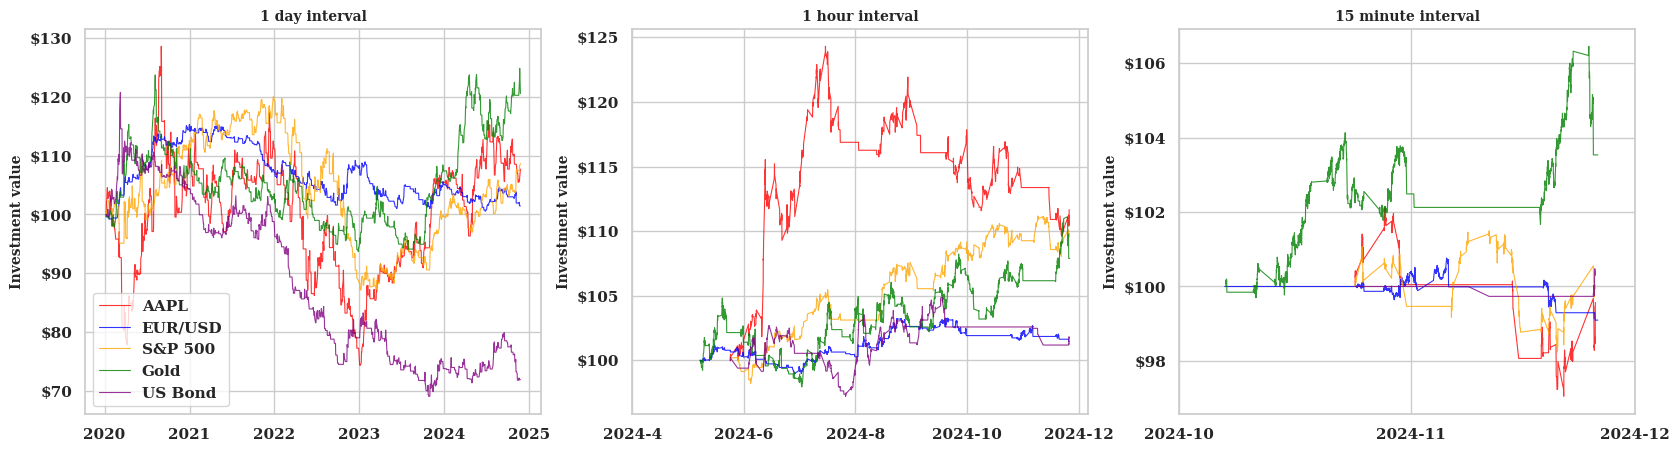

In [21]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 112
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'bold'

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ax1, ax2, ax3 = axes



ax1.plot(data_1d['AAPL']['100$ investment'], color='red', linewidth=0.8, alpha=0.8)
ax1.plot(data_1d['EUR/USD']['100$ investment'], color='blue', linewidth=0.8, alpha=0.8)
ax1.plot(data_1d['S&P 500']['100$ investment'], color='orange', linewidth=0.8, alpha=0.8)
ax1.plot(data_1d['Gold']['100$ investment'], color='green', linewidth=0.8, alpha=0.8)
ax1.plot(data_1d['US Bond']['100$ investment'], color='purple', linewidth=0.8, alpha=0.8)
ax1.set_xticks(['2020', '2021', '2022', '2023', '2024', '2025'])
ax1.set_xticklabels(['2020', '2021', '2022', '2023', '2024', '2025'])
ax1.yaxis.set_major_formatter('${x:1.0f}')
ax1.set_ylabel("Investment value", fontsize=10, fontweight='bold', fontfamily='serif')
ax1.set_title('1 day interval', fontsize=10, fontweight='bold', fontfamily='serif')
ax1.legend(['AAPL', 'EUR/USD', 'S&P 500', 'Gold', 'US Bond'])


ax2.plot(data_1h['AAPL']['100$ investment'], color='red', linewidth=0.8, alpha=0.8)
ax2.plot(data_1h['EUR/USD']['100$ investment'], color='blue', linewidth=0.8, alpha=0.8)
ax2.plot(data_1h['S&P 500']['100$ investment'], color='orange', linewidth=0.8, alpha=0.8)
ax2.plot(data_1h['Gold']['100$ investment'], color='green', linewidth=0.8, alpha=0.8)
ax2.plot(data_1h['US Bond']['100$ investment'], color='purple', linewidth=0.8, alpha=0.8)
dates = pd.to_datetime(['2024-04', '2024-06', '2024-8', '2024-10', '2024-12'])
ax2.set_xticks(dates)  # Set ticks at these dates
ax2.set_xticklabels(['2024-4', '2024-6', '2024-8', '2024-10', '2024-12'])
ax2.yaxis.set_major_formatter('${x:1.0f}')
ax2.set_ylabel("Investment value", fontsize=10, fontweight='bold', fontfamily='serif')
ax2.set_title('1 hour interval', fontsize=10, fontweight='bold', fontfamily='serif')




ax3.plot(data_15m['AAPL']['100$ investment'], color='red', linewidth=0.8, alpha=0.8)
ax3.plot(data_15m['EUR/USD']['100$ investment'], color='blue', linewidth=0.8, alpha=0.8)
ax3.plot(data_15m['S&P 500']['100$ investment'], color='orange', linewidth=0.8, alpha=0.8)
ax3.plot(data_15m['Gold']['100$ investment'], color='green', linewidth=0.8, alpha=0.8)
ax3.plot(data_15m['US Bond']['100$ investment'], color='purple', linewidth=0.8, alpha=0.8)
dates = pd.to_datetime(['2024-10', '2024-11', '2024-12'])
ax3.set_xticks(dates)  # Set ticks at these dates
ax3.set_xticklabels(['2024-10', '2024-11', '2024-12'])
ax3.yaxis.set_major_formatter('${x:1.0f}')
ax3.set_ylabel("Investment value", fontsize=10, fontweight='bold', fontfamily='serif')
ax3.set_title('15 minute interval', fontsize=10, fontweight='bold', fontfamily='serif')
